In [2]:
import sys
print(sys.executable)

c:\Users\slab\.conda\envs\slab\python.exe


In [3]:
import _ssl

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import yaml
from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
import qutip as qt
import time 
import matplotlib.pyplot as plt
import json
# from TomoAnalysis import TomoAnalysis
from TomoILC import TomoILC 
from tqdm import tqdm_notebook as tqdm
%matplotlib widget
import experiments as meas

plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})
plt.rcParams['animation.html'] = 'jshtml'

Could not import QickInstrument (will only work if running on rfsoc). If running on rfsoc, try install/update qick package
Warning failed to import AWG81180A
Warning failed to import Tek5014
Warning failed to import Tek70001
Warning failed to import M8195A
imported experiments.clifford_averager_program
imported experiments.fitting
imported experiments.four_qubit.fourQ_state_tomo
imported experiments.qram_protocol_timestepped
imported experiments.single_qubit.acstarkshift_spectroscopy
imported experiments.single_qubit.amplitude_rabi
imported experiments.single_qubit.length_rabi
imported experiments.single_qubit.pulse_probe_spectroscopy
imported experiments.single_qubit.resonator_spectroscopy
imported experiments.single_qubit.rfsoc_tof_calibration
imported experiments.single_qubit.single_shot
imported experiments.single_qubit.t1
imported experiments.single_qubit.t2_ramsey
imported experiments.three_qubit.threeQ_state_tomo
imported experiments.two_qubit.amplitude_rabi_EgGf
imported experi

In [5]:
from TomoAnalysis import TomoAnalysis
from TomoILC import TomoILC 

In [6]:
"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path
    if filename is not None: temp_data_file = os.path.join(expt_path, filename)
    print(temp_data_file)
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

# Parameters

In [7]:
config_file = 'config_q3diamond_full688and638_reset.yml'
config_path = os.path.join('s:\\Connie\\experiments\\qram_tprocv1_expts\\configs\\', config_file)
with open(config_path, 'r') as cfg_file:
    yaml_cfg = yaml.safe_load(cfg_file)
yaml_cfg = AttrDict(yaml_cfg)

data_path = 'S:\\QRAM\\qram_4QR2\\'
expt_path=os.path.join(data_path, 'data', 'data_241007')
print('Data will be stored in', expt_path)

Data will be stored in s:\Connie\experiments\qramLL_4QR2\data\data_240617


In [8]:
psi_dict = {}

states = ['+0', '0+', '1+', '+1', '++', '00', '10', '11', '01']

file_list = ['00116_qram_protocol.h5', '00117_qram_protocol.h5', '00118_qram_protocol.h5', '00119_qram_protocol.h5', '00120_qram_protocol.h5', '00121_qram_protocol.h5', '00122_qram_protocol.h5', '00123_qram_protocol.h5', '00124_qram_protocol.h5']


file_list_3q = ['00090_QramProtocol3QTomo.h5', '00091_QramProtocol3QTomo.h5', '00092_QramProtocol3QTomo.h5', '00093_QramProtocol3QTomo.h5', '00094_QramProtocol3QTomo.h5', '00095_QramProtocol3QTomo.h5', '00096_QramProtocol3QTomo.h5', '00097_QramProtocol3QTomo.h5', '00098_QramProtocol3QTomo.h5']



for state in states:
    psi_dict[state] = {}
    
psi_dict['00']['state'] = qt.tensor(qt.basis(2, 0), qt.basis(2, 0))
psi_dict['01']['state'] = qt.tensor(qt.basis(2, 0), qt.basis(2, 1))
psi_dict['10']['state'] = qt.tensor(qt.basis(2, 1), qt.basis(2, 0))
psi_dict['11']['state'] = qt.tensor(qt.basis(2, 1), qt.basis(2, 1))
psi_dict['+0']['state'] = (psi_dict['10']['state'] + psi_dict['00']['state']).unit()
psi_dict['+1']['state'] = (psi_dict['11']['state'] + psi_dict['01']['state']).unit()
psi_dict['0+']['state'] = (psi_dict['00']['state'] + psi_dict['01']['state']).unit()
psi_dict['1+']['state'] =  (psi_dict['10']['state'] + psi_dict['11']['state']).unit()
psi_dict['++']['state'] = (psi_dict['00']['state'] + psi_dict['10']['state'] + psi_dict['01']['state'] + psi_dict['11']['state']).unit()

    
for idx, state in enumerate(states):
    psi_dict[state]['filename'] = file_list[idx]
    
for idx, state in enumerate(states):
    psi_dict[state]['filename_3q'] = file_list_3q[idx]
    

In [370]:
tomo_analysis = TomoAnalysis(nb_qubits=2) 
rho_meas = {}
rho_meas_zz = {}          
# ps_adjust= [-1.0, -1, 0, 0]
ps_adjust = [np.inf, np.inf, np.inf, np.inf]
ps_qubit = [0, 1, 2, 3]   

data = []




In [371]:
for state in states:
    
    _data = prev_data(expt_path, psi_dict[state]['filename'])
    data.append(_data)
    
    

s:\Connie\experiments\qramLL_4QR2\data\data_240617\00116_qram_protocol.h5
Extracted data and attrs ['calib_order', 'config', 'meas_order', 'pulse_dict']
s:\Connie\experiments\qramLL_4QR2\data\data_240617\00117_qram_protocol.h5
Extracted data and attrs ['calib_order', 'config', 'meas_order', 'pulse_dict']
s:\Connie\experiments\qramLL_4QR2\data\data_240617\00118_qram_protocol.h5
Extracted data and attrs ['calib_order', 'config', 'meas_order', 'pulse_dict']
s:\Connie\experiments\qramLL_4QR2\data\data_240617\00119_qram_protocol.h5
Extracted data and attrs ['calib_order', 'config', 'meas_order', 'pulse_dict']
s:\Connie\experiments\qramLL_4QR2\data\data_240617\00120_qram_protocol.h5
Extracted data and attrs ['calib_order', 'config', 'meas_order', 'pulse_dict']
s:\Connie\experiments\qramLL_4QR2\data\data_240617\00121_qram_protocol.h5
Extracted data and attrs ['calib_order', 'config', 'meas_order', 'pulse_dict']
s:\Connie\experiments\qramLL_4QR2\data\data_240617\00122_qram_protocol.h5
Extracte

In [372]:
show_count = '10'


for i, state in enumerate(states):
    
    tomo =  meas.EgGfStateTomographyExperiment(
    soccfg=tomo_analysis.rfsoc_config,
    path=expt_path,
    prefix=f"state_tomo",
    config_file=config_path,
    )
    
    _data, _attrs = data[i]
    config = AttrDict(_attrs['config'])
    tomo.cfg = config
    
    n_tomo_raw, n_calib = tomo_analysis.n_tomo_calib_from_data(_data, config, ps_adjust=ps_adjust, ps_qubits=ps_qubit, apply_ps=True, verbose=False)

    
    _rho = tomo_analysis.get_rho_from_counts(n_tomo_raw, n_calib,ZZ_correction=False, correct_neg_counts=True, method='analytical', tomo_qubits=[0,1])
    _rho_zz = tomo_analysis.get_rho_from_counts(n_tomo_raw, n_calib,ZZ_correction=True, tomo_qubits=[0,1])
    rho_meas[state] = _rho
    rho_meas_zz[state] = _rho_zz
    
    if state == show_count:
        print('n raw', n_tomo_raw)
        print('n calib', n_calib)
        
        # n_corr = tomo_analysis.correct_readout_err_legacy(n_tomo_raw, n_calib)
        # print(n_corr)
        # n_corr_neg = tomo_analysis.fix_neg_counts(n_corr)
        print(tomo_analysis.meas_order)
        # print(n_corr_neg)
        # print('new method')
        n_corr = tomo_analysis.correct_readout_err(n_tomo_raw, n_calib, verbose=True)
        print(n_corr)
            

n raw [[0.1104     0.03663333 0.66643333 0.18653333]
 [0.09433333 0.149      0.45733333 0.29933333]
 [0.1009     0.16093333 0.45876667 0.2794    ]
 [0.44046667 0.0912     0.35866667 0.10966667]
 [0.28133333 0.29696667 0.25186667 0.16983333]
 [0.28576667 0.28846667 0.25233333 0.17343333]
 [0.41126667 0.094      0.3846     0.11013333]
 [0.26773333 0.2862     0.27096667 0.1751    ]
 [0.27713333 0.2942     0.26113333 0.16753333]]
n calib [[0.77313333 0.16206667 0.04893333 0.01586667]
 [0.18543333 0.7421     0.02036667 0.0521    ]
 [0.12206667 0.03686667 0.65636667 0.1847    ]
 [0.0728     0.28126667 0.15643333 0.4895    ]]
['ZZ' 'ZX' 'ZY' 'XZ' 'XX' 'XY' 'YZ' 'YX' 'YY']
result  message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.5995393860787497e-09
       x: [ 2.266e-01  2.613e-01  3.293e-01  1.829e-01]
     nit: 32
     jac: [ 6.360e-01  6.710e-01  5.712e-01  5.463e-01]
    nfev: 208
    njev: 32
[[-1.69596180e-16  5.81255997e-17  1.00000000e+00 -2.7179442

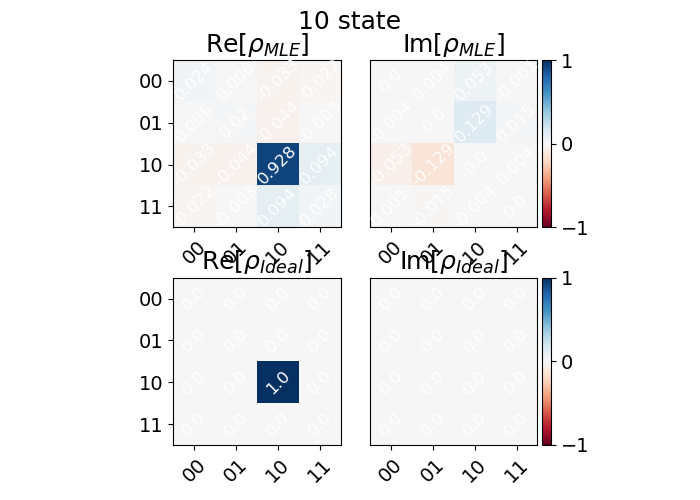

In [373]:
state_plot = '10'
F = {}
F_zz = {}

for state in states:
    rho_ideal = psi_dict[state]['state'] * psi_dict[state]['state'].dag()
    
    _rho = rho_meas[state]
    _rho_zz = rho_meas_zz[state]
    

    if state == state_plot:
        tomo_analysis.show_plot_rho_2d(_rho_zz, rho_ideal.full(), title=f'{state} state', size=(7, 5))
        # tomo_analysis.show_plot_rho_2d(_rho, rho_ideal.full(), title=f'{state} state', size=(7, 5))

    
    _rho = qt.Qobj(_rho)
    _rho_zz = qt.Qobj(_rho_zz)
    _rho.dims = rho_ideal.dims
    _rho_zz.dims = rho_ideal.dims
    
    F[state] = qt.metrics.fidelity(_rho, rho_ideal)**2
    F_zz[state] = qt.metrics.fidelity(_rho_zz, rho_ideal)**2


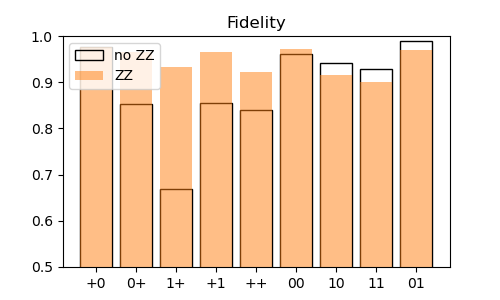

In [355]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.bar(F.keys(), F.values(), fill=False, label='no ZZ')
ax.bar(F_zz.keys(), F_zz.values(), fill=True, alpha=0.5, label='ZZ')

ax.set_title('Fidelity')
ax.set_ylim(0.5, 1)
ax.legend()


In [9]:
data_3q = []    

for state in states:
        
        _data = prev_data(expt_path, psi_dict[state]['filename_3q'])
        data_3q.append(_data)

s:\Connie\experiments\qramLL_4QR2\data\data_240617\00090_QramProtocol3QTomo.h5
Extracted data and attrs ['calib_order', 'config', 'meas_order', 'pulse_dict']
s:\Connie\experiments\qramLL_4QR2\data\data_240617\00091_QramProtocol3QTomo.h5
Extracted data and attrs ['calib_order', 'config', 'meas_order', 'pulse_dict']
s:\Connie\experiments\qramLL_4QR2\data\data_240617\00092_QramProtocol3QTomo.h5
Extracted data and attrs ['calib_order', 'config', 'meas_order', 'pulse_dict']
s:\Connie\experiments\qramLL_4QR2\data\data_240617\00093_QramProtocol3QTomo.h5
Extracted data and attrs ['calib_order', 'config', 'meas_order', 'pulse_dict']
s:\Connie\experiments\qramLL_4QR2\data\data_240617\00094_QramProtocol3QTomo.h5
Extracted data and attrs ['calib_order', 'config', 'meas_order', 'pulse_dict']
s:\Connie\experiments\qramLL_4QR2\data\data_240617\00095_QramProtocol3QTomo.h5
Extracted data and attrs ['calib_order', 'config', 'meas_order', 'pulse_dict']
s:\Connie\experiments\qramLL_4QR2\data\data_240617\0

In [41]:
ps_qubit = [0, 1, 2, 3]
# ps_adjust = [-1.5, 0,0 , 0]
ps_adjust = [np.inf, np.inf, np.inf, np.inf]

tomo_analysis_3q = TomoAnalysis(nb_qubits=3)

n raw [[0.54409333 0.05473333 0.04478667 0.00385333 0.29738667 0.03234667
  0.02042667 0.00237333]
 [0.32105333 0.32052    0.02956    0.02181333 0.14550667 0.14077333
  0.01101333 0.00976   ]
 [0.3262     0.30944    0.03081333 0.02181333 0.15334667 0.13898667
  0.01073333 0.00866667]
 [0.32496    0.02912    0.34349333 0.01502667 0.129      0.01573333
  0.13473333 0.00793333]
 [0.18149333 0.17358667 0.20542667 0.15546667 0.07386667 0.06948
  0.07945333 0.06122667]
 [0.16790667 0.16432    0.19830667 0.15       0.08165333 0.07774667
  0.09216    0.06790667]
 [0.30004    0.02721333 0.32437333 0.01342667 0.15125333 0.01686667
  0.15782667 0.009     ]
 [0.17224    0.16865333 0.19594667 0.15130667 0.07864    0.07698667
  0.08814667 0.06808   ]
 [0.16578667 0.15762667 0.18801333 0.14302667 0.08842667 0.08458667
  0.09941333 0.07312   ]
 [0.7922     0.05882667 0.05704    0.00390667 0.05085333 0.02494667
  0.00990667 0.00232   ]
 [0.43757333 0.4086     0.03617333 0.02696    0.03065333 0.04645333

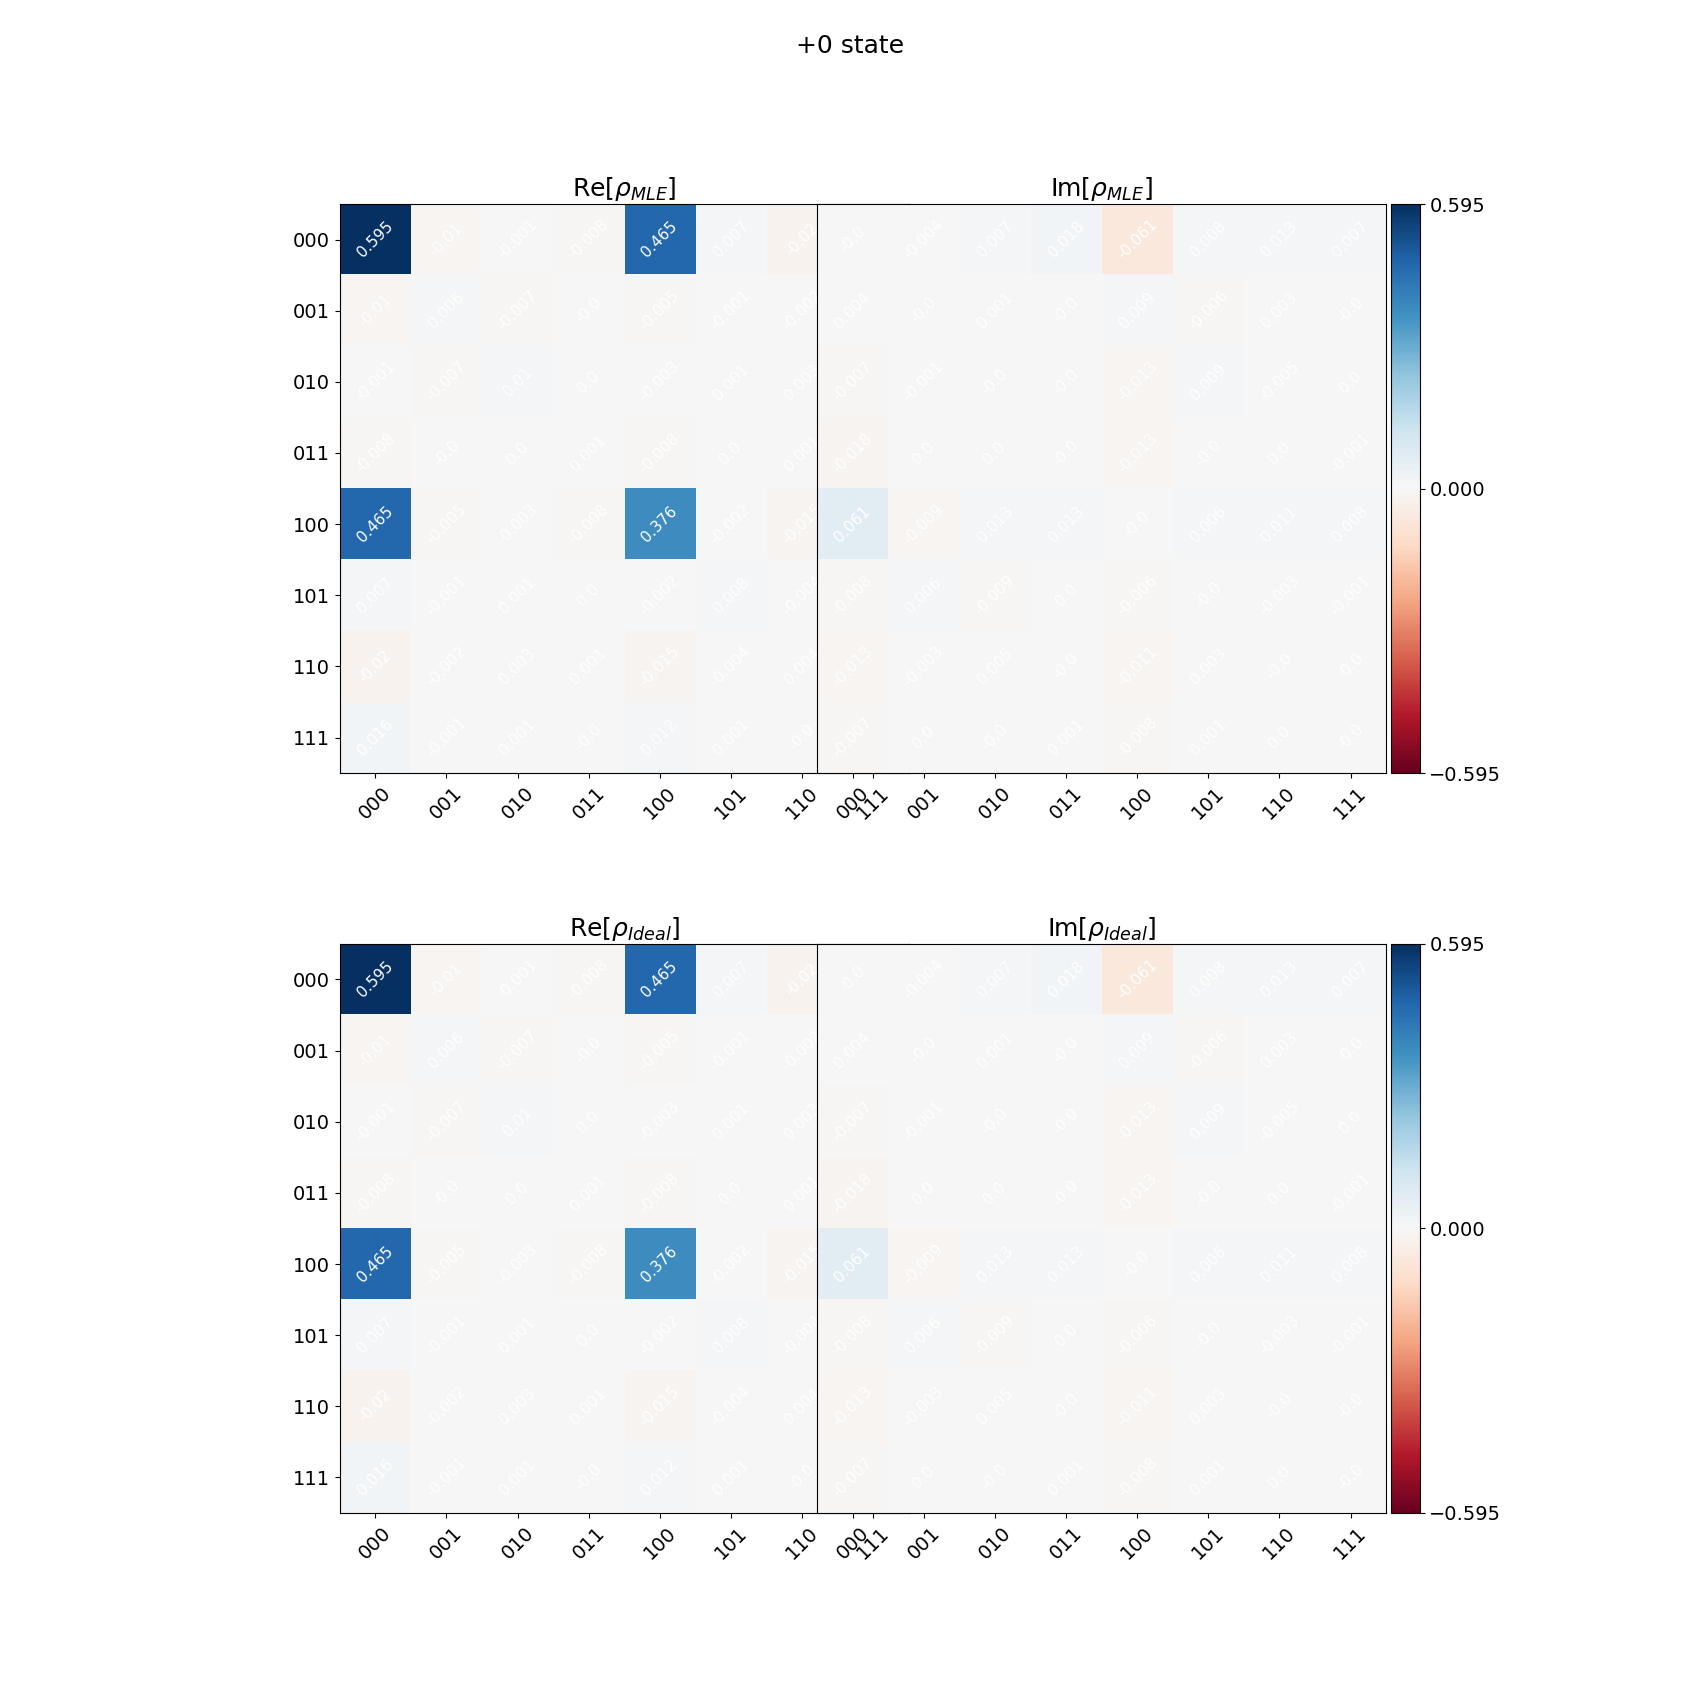

In [46]:
show_count = '+0'


for i, state in enumerate(states):
    
    tomo =  meas.EgGfStateTomographyExperiment(
    soccfg=tomo_analysis_3q.rfsoc_config,
    path=expt_path,
    prefix=f"state_tomo",
    config_file=config_path,
    )
    
    _data, _attrs = data_3q[i]
    config = AttrDict(_attrs['config'])
    tomo.cfg = config
    
    n_tomo_raw, n_calib = tomo_analysis_3q.n_tomo_calib_from_data(_data, config, ps_adjust=ps_adjust, ps_qubits=ps_qubit, apply_ps=True, verbose=False)

    
    _rho = tomo_analysis_3q.get_rho_from_counts(n_tomo_raw, n_calib,ZZ_correction=False, correct_neg_counts=True, method='analytical', tomo_qubits=[0,2,3])
    # _rho_zz = tomo_analysis.get_rho_from_counts(n_tomo_raw, n_calib,ZZ_correction=True, tomo_qubits=[0,1])
    # rho_meas[state] = _rho
    # rho_meas_zz[state] = _rho_zz
    
    if state == show_count:
        print('n raw', n_tomo_raw)
        print('n calib', n_calib)
        
        # n_corr = tomo_analysis.correct_readout_err_legacy(n_tomo_raw, n_calib)
        # print(n_corr)
        # n_corr_neg = tomo_analysis.fix_neg_counts(n_corr)
        print(tomo_analysis_3q.meas_order)
        print(tomo_analysis_3q.calib_order)
        # print(n_corr_neg)
        # print('new method')
        n_corr = tomo_analysis_3q.correct_readout_err(n_tomo_raw, n_calib, verbose=True)
        print(n_corr)
        
        # plot the rho
        
        # rho_ideal = psi_dict[state]['state'] * psi_dict[state]['state'].dag()
        # _rho = qt.Qobj(_rho)
        # _rho.dims = rho_ideal.dims
        tomo_analysis_3q.show_plot_rho_2d(_rho, _rho, title=f'{state} state', size=(17, 17))
            